# Parker Dunn
(pgdunn@bu.edu | pdunn91@gmail.com)  
Created on July 1st, 2022


__Assignment for COURSERA: Introduction to Deep Learning (via CU Boulder)__

__Assignment:__ Week 3 - CNN Cancer Detection Kaggle Mini-Project

## Progress...
[DONE - 1st draft] Step 1 - Description of the data and problem  
[*in progress*] Step 2 - EDA  
[ _ ] Step 3 -  
[ _ ] Step 4 -  
[ _ ] Step 5 -  
[ _ ] Step 6 -  

# Information about the Competition/Data
___

The Kaggle competition is called "Histopathologic Cancer Detection"  
LINK: https://www.kaggle.com/c/histopathologic-cancer-detection

### Data Description (from Kaggle)

In this dataset, you are provided with a large number of small pathology images to classify. Files are named with an image id. The train_labels.csv file provides the ground truth for the images in the train folder. You are predicting the labels for the images in the test folder. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a whole-slide image.

The original PCam dataset contains duplicate images due to its probabilistic sampling, however, the version presented on Kaggle does not contain duplicates. We have otherwise maintained the same data and splits as the PCam benchmark.

___
# My work starts here
___

In [1]:
# imports of packages

from helperfunctions import *

# Setup

%matplotlib inline

## Step 1 - Description of the data and problem

For this project, originally a Kaggle competition, the task is to identify images of cells that contain metastatic cancer. This is a binary classification task on images. If an image contains at least one pixel of tumor tissue within a specified region, it is given a positive label. The images are 96x96 pixels, but the specific region used to classify the images is the center 32x32 pixel region. The task is setup this way to enable fully-convolutional models that do not use padding.

The data for this task is provided as 96x96 images, which are small parts of larger images. Reading in the three color channels (RGB) for each pixel,  this means there are 27,648 total features for each image: the three RGB channels for each pixel and 9,216 pixels. Each pixel is provided as three values from 0 to 255, representing the contribution of each RGB color channel.

There are 277,483 images provided for this task. The images are divided into 220,025 images for training, since the corresponding labels are provided, and 57,458 images without provided labels. For these test images, a model will try to correctly predict whether these images have (1) or do not have (0) metastatic cancer cells.

Summary:
* 96x96x3 dimensions for each image -> 27,648 features initially
* 220,025 images in training set
* TRAINING: 27648 features x 220,025 images

### Loading the data

**BELOW** -> Too much data to read all images in at once

In [2]:
# X, X_IDs, X_test, X_test_IDs, Y_df = read_data()

# samples in 'X' and file names in 'X_ids' are in the same order as long as they are not sorted!

Instead, I will read in the data that I can to start.
- Load image labels for trianing data
- Load names of all files

As I need the images, I will have to load them one at a time!

In [3]:
training_images, testing_images, y_train = load_image_info()

y_train.head(8)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
5,acfe80838488fae3c89bd21ade75be5c34e66be7,0
6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1


In [4]:
print("Double checking the type of the 'id' of the images...",
      "\n\n",
      y_train.loc[0,'id'],
      "\n\n",
      type(y_train.loc[0,'id']))

Double checking the type of the 'id' of the images... 

 f38a6374c348f90b587e046aac6079959adf3835 

 <class 'str'>


## Step 2 - Exploratory Data Analysis (EDA)

#### Inspecting a single image

id       f38a6374c348f90b587e046aac6079959adf3835
label                                           0
Name: 0, dtype: object
<class 'pandas.core.series.Series'> 




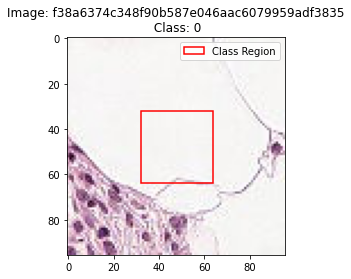

In [5]:
print(y_train.iloc[0,:])
print(type(y_train.iloc[0,:]),"\n\n")

# Function from 'helperfunctions.py'
show_training_image(y_train.iloc[0,:])


#### Inspecting multiple images